# Vitol: Junior Data Science Test. (by Vitalija Alisauskaite)

Please review all cells, following instructions for each and adding code and commentary where required.

Contact: dpb@vitol.com, ncy@vitol.com

May 2020

## 1. Python Basics

In [26]:
## Question 1:
# A common Python interview question is to correctly identify the output of lines 15, 16, and 17.
# As you can see the output here, instead we would like you to:
#   1 - Describe why the output of lines 15, 16, and 17 is what it is
#   2 - Critique and re-write this function (is there anything odd or incorrect about it?)

def extendList(val, list=[]):
    list.append(val)
    return list
 
list1 = extendList(10)
list2 = extendList(123,[])
list3 = extendList('a')
 
print("list1 = {}".format(list1))
print("list2 = {}".format(list2))
print("list3 = {}".format(list3))

# Add commentary here
# See the Solution to Question 1

# Revise code above as desired
# The code contains a number of defects
# 1. It redefines a built-in type keyword list
# 2. Functions behavior is not transparent, for example it is not quite obvious
#    what value the function is going to return if you are not providing a list argument.
# 3. The functionality provided by extendList can be easily replicated with the existing methods
#    This would result in much more clear and transparent solution.

# That is how our code would look if we wouldn't use extendList function
print("\nClear and Simple Code Results\n")

newList1 = [10]
newList2 = [123]
newList3 = ['a']

print("newList1 = {}".format(newList1))
print("newList2 = {}".format(newList2))
print("newList3 = {}".format(newList3))

# Suppose we want to append an element 'b' to newList3
newList3.append('b')
print("Updated newList3 = {}".format(newList3))

list1 = [10, 'a']
list2 = [123]
list3 = [10, 'a']

Clear and Simple Code Results

newList1 = [10]
newList2 = [123]
newList3 = ['a']
Updated newList3 = ['a', 'b']


### Solution to Question 1:

When we run the code we get the following output
```
list1 = [10, 'a']
list2 = [123]
list3 = [10, 'a']
```

Python works with lists by reference: i.e. list object stores pointers to objects, not the actual objects themselves. Python creates a single new list every time you execute the [] expression. No more, no less. And Python never creates a new list if you assign a list to a variable.

Let me go through some lines of code and explain what is going on there.

In case of list1 we do not provide a list argument to function extendList, 
in this case a function extendList kindly creates for us an empty list and calls it list.
Then the function appends value 10 to list and returns a reference to list to the list1.
After the function is executed list1 contains a reference to the internal list of the 
function extendList.

<code>
list1 = extendList(10)
</code>

At this stage list1 points to [10]. 

Let's move to list2. In this case we provide a brand new empty list to the function extendList
The function appends to this list number 123 and returns a reference to this list to list2.

<code>
list2 = extendList(123,[])
</code>

At this stage list1 points to [10], and list2 points to [123]

In case of list3, we do not provide a list argument to the function extendList
and the function kindly provides its own list which equals to [10] at this moment (list1 is pointing at it!).
It appends 'a' to this list, and returns a reference to it to the list3.

list3 = extendList('a')

At this stage list1 points to [10, 'a'], list2 points to [123], and # list3 points to [10, 'a'].


In [27]:
# Solution to Question 1: Code
# This code demonstrates what is happening in the code in Question 1

def extendList(val, list=[]):
    print("\nInside extendList:")
    print("list address before update:", id(list))
    print("list value before update:", list)
    
    list.append(val)
    
    print("list address after update: ", id(list))
    print("list value after update:", list)
    print("Exiting function extendList.\n")
    return list

print("\nRunning list1 case:")
list1 = extendList(10)
print("list1 address:", id(list1))
print("list1 points at: ", list1)
print("***** End of list 1 case *****")

print("\nRunning list2 case:")
list2 = extendList(123,[])
print("list2 address:", id(list2))
print("list2 points at: ", list2)
print("***** End of list 2 case *****")

print("\nRunning list3 case:")
list3 = extendList('a')
print("list3 address:", id(list3))
print("list3 points at: ", list3)
print("***** End of list 3 case *****")

print()
print("Please note that list1 and list3 are pointing to the one and the same list!!!")
print()
 
print("list1 = {}".format(list1))
print("list2 = {}".format(list2))
print("list3 = {}".format(list3))



Running list1 case:

Inside extendList:
list address before update: 140592439669320
list value before update: []
list address after update:  140592439669320
list value after update: [10]
Exiting function extendList.

list1 address: 140592439669320
list1 points at:  [10]
***** End of list 1 case *****

Running list2 case:

Inside extendList:
list address before update: 140592439669128
list value before update: []
list address after update:  140592439669128
list value after update: [123]
Exiting function extendList.

list2 address: 140592439669128
list2 points at:  [123]
***** End of list 2 case *****

Running list3 case:

Inside extendList:
list address before update: 140592439669320
list value before update: [10]
list address after update:  140592439669320
list value after update: [10, 'a']
Exiting function extendList.

list3 address: 140592439669320
list3 points at:  [10, 'a']
***** End of list 3 case *****

Please note that list1 and list3 are pointing to the one and the same list!!

In [28]:
## Question 2:
# Data, iterators, generators: 
#   1 - Write a "generator" function that produces the elements of the following list ('source_data')
#   2 - Describe when using a generator/iterator is imporant and why

source_data = [1,2,3,-2,4,3,"two",5,0,7,8,9,"one","two","three", 25]

# Add code
def data_generator():
    return (x for x in source_data)

print(data_generator())

# Describe when to use generator/iterator is important and why
print("""
    The generators are used when we do not want (or do not need) to create an array to store the values
    that we want to iterate over.
    Possible use cases: 
    Watching/Monitoring real time data (something similar to top command in Unix)
    Live time processing of real time data. Dynamic dashboards.
    Building of data pipelines.
""")

<generator object data_generator.<locals>.<genexpr> at 0x7fde7424ea40>

    The generators are used when we do not want (or do not need) to create an array to store the values
    that we want to iterate over.
    Possible use cases: 
    Watching/Monitoring real time data (something similar to top command in Unix)
    Live time processing of real time data. Dynamic dashboards.
    Building of data pipelines.



In [29]:
## Question 3:
# Error handling: Using the generator from the previous cell, iterate over all elements produced 
# by the generator. For each element e, store the value of the following function, 
# or catch and handle the specific errors that arise in attempting to execute the function: 
# f(e) = NaturalLog(e) / e
# On error for element e, report appropriate message and store an error value for e.

# Add code
import math 

source_data = [1,2,3,-2,4,3,"two",5,0,7,8,9,"one","two","three", 25]

def data_generator():
    return (x for x in source_data)

def func(x):
    return math.log(x)/x

error_values = []
for data in data_generator():
    err_msg = "No"
    try:
        fval = func(data)
        print("x: {0}; f(x): {1}; Error: {2}".format(data, fval, err_msg))
    except (ValueError, TypeError) as e:
        error_values.append(data)
        fval = None
        err_msg = e
        print("x: {0}; f(x): {1}; Error: {2}".format(data, fval, err_msg))
    except Exception as e:
        error_values.append(data)
        fval = None
        err_msg = e
        print("x: {0}; f(x): {1}; Unexpected Error: {2}".format(data, fval, err_msg))
        
print("\nValues that caused an error:", error_values) 

x: 1; f(x): 0.0; Error: No
x: 2; f(x): 0.34657359027997264; Error: No
x: 3; f(x): 0.3662040962227033; Error: No
x: -2; f(x): None; Error: math domain error
x: 4; f(x): 0.34657359027997264; Error: No
x: 3; f(x): 0.3662040962227033; Error: No
x: two; f(x): None; Error: must be real number, not str
x: 5; f(x): 0.32188758248682003; Error: No
x: 0; f(x): None; Error: math domain error
x: 7; f(x): 0.277987164150759; Error: No
x: 8; f(x): 0.25993019270997947; Error: No
x: 9; f(x): 0.24413606414846883; Error: No
x: one; f(x): None; Error: must be real number, not str
x: two; f(x): None; Error: must be real number, not str
x: three; f(x): None; Error: must be real number, not str
x: 25; f(x): 0.128755032994728; Error: No

Values that caused an error: [-2, 'two', 0, 'one', 'two', 'three']


In [30]:
## Question 4:
# Lists etc: What is the "cleanest" and shortest code to get a new, sorted, unique-items-only version
# of the 'source_data' list (also: use the generator from previous cell)

# Add code
source_data = [1,2,3,-2,4,3,"two",5,0,7,8,9,"one","two","three", 25]

def unique_data_generator():
    return ( x for x in sorted( list(set(source_data)), key=str) )

print(unique_data_generator())

for item in unique_data_generator():
    print(item, end = " ")

<generator object unique_data_generator.<locals>.<genexpr> at 0x7fde3a684888>
-2 0 1 2 25 3 4 5 7 8 9 one three two 

In [31]:
## Question 5:
# Object Oriented Programming. Please write a number of classes to process and represent simple data,
# as follows:
#   1 - A superclass to represent a single data entry with two features. Superclass should have functionality to
#       store underlying "raw" data and to display formatted data.
#       Extend with a subclass to represent an entry from a more specific source containing additional numerical
#       data. 
#   2 - A factory class to produce an object given a "row" of input data, such as might be obtained from reading 
#       in a CSV file.
#   3 - Iterate over all sample rows given below ('rows'), using the factory to create objects.
#   4 - Very briefly describe why this type of code might be valuable or important.
#
# Note: include code to "standardize" data from each row (process strings, ensure data types, etc)

class GameObject(object):
    def __init__(self, title, isFriend):
        self.title = title
        self.isFriend = isFriend
        
    def __str__(self):
        return("{0}, {1}".format(self.title, self.isFriend))

class GameActor(GameObject):
    def __init__(self, title, health, isFriend):
        self.health = health
        super().__init__(title, isFriend)
        
    def __str__(self):
        return("{0}, {1}, {2}".format(self.title, self.isFriend, self.health))

super_rows = [
    ["Pegasus", "True"],
    ["Unicorn", "False"]
]
sub_rows = [
    ["Alicorn", "23.1", "True"],
    ["basilisk", "120.433", "False"],
    ["ChiMera", "101.2", "False"],
    ["Griffin", "65.88", "True"],
    ["Nemean lion", "2,465.21", "False"],
    ["0rthros", "52.01", "False"],
    ["Cockatrice", "nan", "True"],
]

# Solution to Question 5: 

# 1. I do not think that it is a good idea to mix different classes,
# hence lets abandon rows = super_rows + sub_rows

# 2. There is also no need in a factory class to produce instances out of the given records.

# Add ingestion code here

game_objects = []
for row in super_rows:
    game_objects.append( GameObject(*row) )
    
game_actors = []
for row in sub_rows:
    game_actors.append( GameActor(*row) )
    
# Printing game objects that you can not interact with
print("\nGame Objects:")
for obj in game_objects:
    print("\t", obj)
    
# Printing game objects that you can interact with
print("\nGame Actors:")
for actor in game_actors:
    print("\t", actor)
    


Game Objects:
	 Pegasus, True
	 Unicorn, False

Game Actors:
	 Alicorn, True, 23.1
	 basilisk, False, 120.433
	 ChiMera, False, 101.2
	 Griffin, True, 65.88
	 Nemean lion, False, 2,465.21
	 0rthros, False, 52.01
	 Cockatrice, True, nan


## 2. Data Project

In [32]:
## Question 6:
# Navigate to https://archive.ics.uci.edu/ml/datasets/El+Nino and download the El Nino Dataset
# Note that there are multple files in the data directory - it is up to you to choose which to
# work with for this exercise.
# Write a class to programatically represent the data entries, as well as a function to read in the data
# from file ('get obj it')
# Your class must be able to support the functionality in the subsequent cell(s)

class ElNinoData(object):
    # Your implementation here
    colnames = ['buoy', 'day', 'latitude', 'longitude', 
                'zone_wind',  'meridian_wind', 'humidity',
                'air_temperature', 'sea_temperature' ]
    
    rlength = len(colnames)
    
    coltypes = [int, int, float, float, float, float, float, float, float]
   
    def __init__(self, buoy, day, latitude, longitude, 
                 zone_wind, meridian_wind, humidity, 
                 air_temperature, sea_temperature):
        
        self.buoy = buoy
        self.day = day 
        self.latitude = latitude
        self.longitude = longitude
        self.zone_wind = zone_wind
        self.meridian_wind = meridian_wind
        self.humidity = humidity
        self.air_temperature = air_temperature
        self.sea_temperature = sea_temperature
        
    def __str__(self):
        return "{0}, {1}, ({2}, {3}), {4}, {5}, {6}, {7}".format(self.buoy, 
                         self.day, 
                         self.latitude, self.longitude, 
                         self.zone_wind, self.meridian_wind, 
                         self.humidity, self.air_temperature, self.sea_temperature)
    
    def get_humidity(self):
        return self.humidity
    
    def set_humidity(self, value):
        if isinstance(value, float):
            self.humidity = value
        else:
            self.humidity = None
        
    @classmethod
    def create_from_string(cls, s):
        """
            Creates a class object from string
        """
        object_array = []
        input_data = s.split()
        for i in range(ElNinoData.rlength):
            try:
                object_attr = ElNinoData.coltypes[i] (input_data[i])
            except ValueError:
                object_attr = None
            object_array.append(object_attr)
            
        return cls(*object_array)
            
                
def get_obj_it():
    with open('Data/elnino') as f:
        for line in f:
            if len(line.strip()) > 0:
                yield ElNinoData.create_from_string(line)

In [33]:
## Question 7
# Based on your code above, the following code should now be runnable

def average_humidity():
    
    e_n_generator = get_obj_it()
    
    count = 0;
    hum_sum = 0;
    
    for e_n_row in e_n_generator:
        # the if statement has been added: otherwise the computation won't be correct
        if e_n_row.get_humidity():
            count += 1
            hum_sum += e_n_row.get_humidity()
      
    print("Mean Humidity is '{}' Percent".format(hum_sum/count))
    print("Number of observations used: {0}.".format(count))
    
    return hum_sum/count
    
avg_humidity = average_humidity()


Mean Humidity is '84.45814102564111' Percent
Number of observations used: 624.


In [34]:
## Question 8
# Write a new function that does the same as the previous function, but this time replaces any missing
# values in an observation with the average of all non-missing values for that variable

def average_humidity_updated():
    e_n_generator = get_obj_it()
    
    count = 0;
    hum_sum = 0;
    
    for e_n_row in e_n_generator:
        if e_n_row.get_humidity() is None:
            e_n_row.set_humidity(avg_humidity)
        count += 1
        hum_sum += e_n_row.get_humidity()
        
    print("Mean Humidity is '{}' Percent".format(hum_sum/count))
    print("Number of observations used: {0}.".format(count))
    return hum_sum/count

avg_humidity = average_humidity_updated()


Mean Humidity is '84.45814102564124' Percent
Number of observations used: 782.


## 3. Visualization

In [35]:
## Question 9
# Visualize the newly completed humidity data, alongside the other fields in the data, in a way that 
# highlights any interesting relationships you discover (this will be a multidimensional visualization) 
#
# Solution Plan
#
# 1. First we will try to answer the question what is El Nino.
# 2. Next we will try to figure out how the observation buoys are located across the ocean.
# 3. Finally we will build the heatmap that shows the change of humidity by day and 
#    by the buoy clusters. 

### 3.1. Exploratory Event Analysis: What is El Nino?


El Nino is a climate phenomenon that occurs when a vast pool of water in the eastern tropical
Pacific Ocean becomes abnormally warm. It drives the warm water and the rains to the western Pacific.

El Nino occurs every few years. It's most direct impacts are droughts in normally damp places
in the eastern Pacific, such as part of Indonesia and Australia, while normally dry places like
the west coast of South America suffer floods.

![title](Images/elnino.png)

### 3.2. How are the Observation Buoys Located?

In [36]:
# Import of external modules

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
from vega_datasets import data as vds


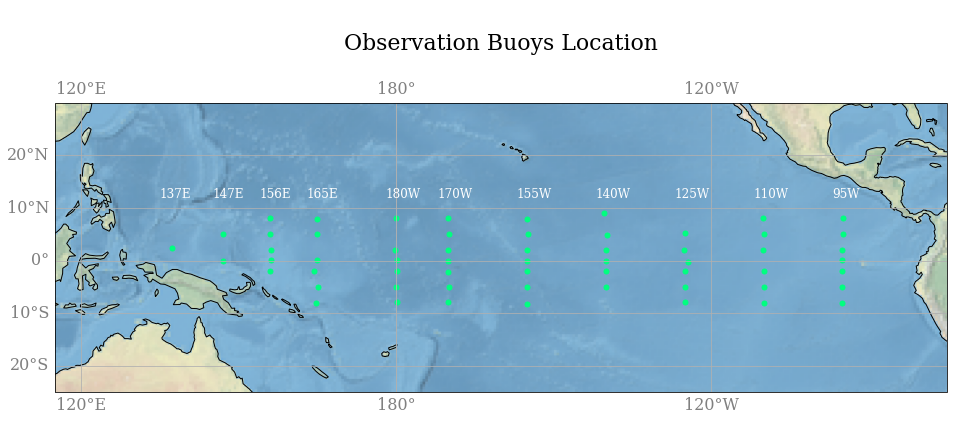

In [37]:
# Graphical Analysis: How are the Observation Buoys Located?

plt.rcParams["font.family"] = "serif"
plt.figure(figsize=(16,12))

m4 = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
m4.set_title("\nObservation Buoys Location\n", fontsize = 22, fontweight ="normal")
m4.set_extent([115, 285, -25, 30], ccrs.PlateCarree())  
m4.add_feature(cfeature.OCEAN)
m4.add_feature(cfeature.COASTLINE)

gridlines = m4.gridlines(draw_labels=True)
gridlines.xlabel_style = {'size': 16, 'color': 'gray'}
gridlines.ylabel_style = {'size': 16, 'color': 'gray'}

# add buoy points and mark clusters
groups = {"180W":-180, "170W":-170, "155W":-155, "140W":-140, "125W":-125, "110W":-110, "95W":-95, 
          "137E":137, "147E":147, "156E":156, "165E":165}
for obj in obj_generator():
    if obj.day == 1:
        m4.scatter(obj.longitude, obj.latitude, color="springgreen", s=25, 
                   transform=ccrs.PlateCarree())

for k,v in groups.items():
    clusters = plt.text(v - 2, 12, k, transform=ccrs.PlateCarree(),
                       horizontalalignment='left', size = 12,
                        color = "white"
                       )
        
m4.stock_img()

### 3.1 Humidity Heatmap by Day and Longitude

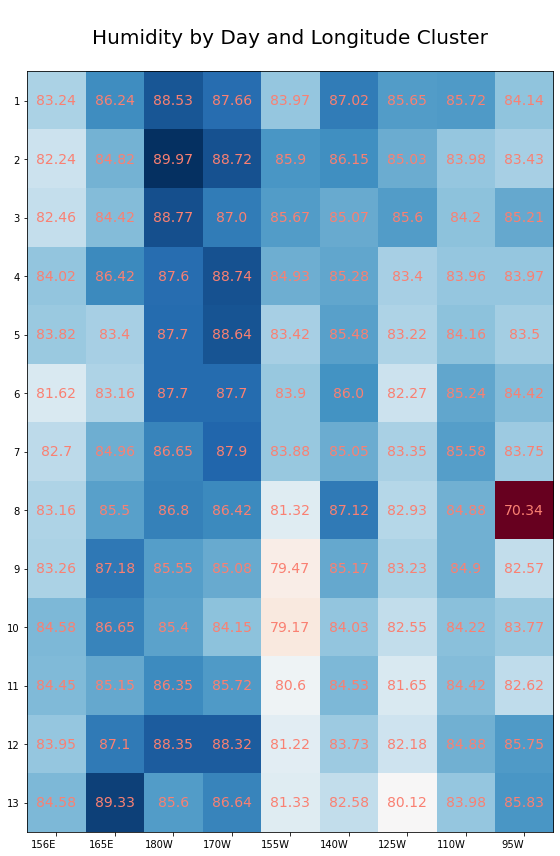

In [38]:
# Humidity Heatmap by Day and Longitude
# Note: I have excluded from the analysis buoys located in clusters 137E and 147E
#

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import csv

input_file = "Data/elnino_by_clusters.csv"

groups = ["156E", "165E", "180W", "170W", "155W", "140W", "125W", "110W", "95W"]
days = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"]

humidity = np.zeros(len(days) * len(groups)).reshape(len(days), len(groups))

# reading the data from the file
with open(input_file, newline="") as f:
    reader = csv.DictReader(f)
    for row in reader:
        day_idx = days.index(row["day"])
        group_idx = groups.index(row["group"])
        humidity_obs = row["humidity"]
        
        humidity[day_idx, group_idx] = humidity_obs
        
# setting colormap
cmap = "RdBu"
        
# making a plot
plt.rcParams["font.family"] = "sans serif"

fig, ax = plt.subplots(1, figsize = (20, 12))
im = ax.imshow(humidity, cmap=cmap)

# adding ticks
ax.set_xticks(np.arange(len(groups)))
ax.set_yticks(np.arange(len(days)))

# labeling ticks
ax.set_xticklabels(groups)
ax.set_yticklabels(days)

# rotating the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# creating text annotations.
for i in range(len(days)):
    for j in range(len(groups)):
        text = ax.text(j, i, humidity[i, j],
                       ha="center", va="center", color="salmon", fontsize=14)
        
ax.set_title("\nHumidity by Day and Longitude Cluster\n", fontsize=20)
fig.tight_layout()
plt.show()

### 3.4 Summary

1) I tried to visualize humidity changes over longitude on a day to day basis. I believe that 
   the visualization helps to observe the changes/movements in rainfall/humidity in time and space. 
   Potentially, it could be useful in trying to make a short-term prediction of the arrival of El Nino. 
   At least that is what I was trying to capture!

2) Data eror: That was unexpected, and I was not really looking for that! 
   The observation on day 8, cluster "95W" seems to be quite different from all the rest! 
   If one checks the underlying data, he/she can notice that humidity record 
   on day 8 for the buoy number 20 looks suspicious!